In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN


In [ ]:
ticker = 'AAPL'
data = yf.download(ticker, start="2020-01-01", end="2025-01-01")
data = data['Close'].values.reshape(-1, 1)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [15]:
data

array([[ 72.71606445],
       [ 72.00911713],
       [ 72.58290863],
       ...,
       [255.30929565],
       [251.92301941],
       [250.14497375]])

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [ ]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)
X = X.reshape(X.shape[0], X.shape[1], 1)


In [ ]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=50, return_sequences=False))
model.add(Dense(units=1))
# model.compile(optimizer='adam', loss='mean_squared_error')

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=64)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.0000e+00 - loss: 0.0426
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.0000e+00 - loss: 0.0024
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.0000e+00 - loss: 0.0011
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0000e+00 - loss: 6.6450e-04
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.0000e+00 - loss: 5.4472e-04
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.0000e+00 - loss: 4.9898e-04
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.0000e+00 - loss: 4.5758e-04
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0000e+00 - loss: 3.9884e-04
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.0000e+00 - loss: 4.3070e-04
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.0000e+00 - loss: 3.9878e-04
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.0000e+00 - loss

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


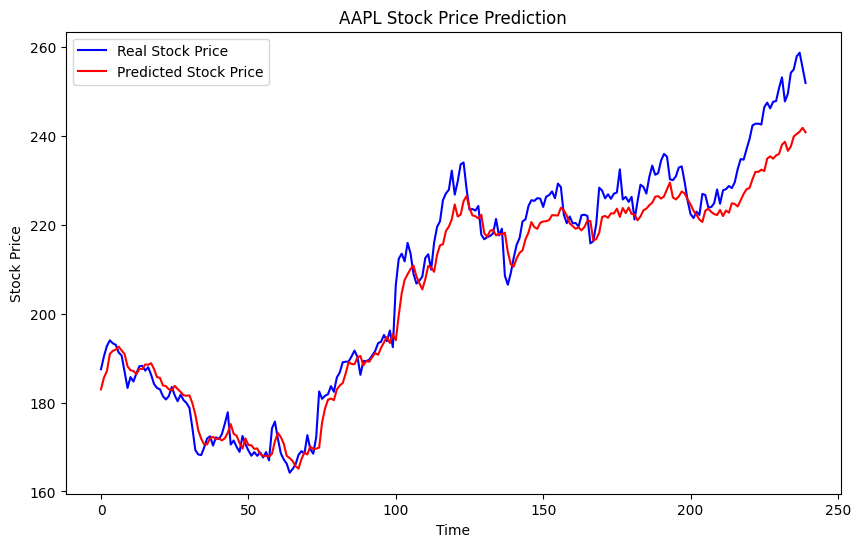

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Real Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
